# Logistic Regression

Logistic regression is a commonly used technique for solving binary classification problems.

In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [565]:
df = pd.read_csv('./weatherAUS.csv')
df.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [566]:
df.shape

(145460, 23)

In [567]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

We have a weather dataset describing about the weather condition of each day with multiple fields which we can use to trian a model which can potentially replace a meteorologist to predict the weather at some location provided that w have the weather information of today.

### Logistic regression usage:-

Logistic regression is a commonly used technique for solving binary classification problems.

### Classification problems:-

Problems where each input must be assigned a discrete category (also called labels or classes) are known as classification problems.

for example - 
1. Rainfall Prediction
2. Breast Cancer.
3. Loan Repayment Prediction.
4. Hand Written Digit Recognition.

etc..

### Logistic Regression for Solving Classification Problems

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. For a mathematical discussion of logistic regression, sigmoid activation and cross entropy. Logistic regression can also be applied to multi-class classification problems, with a few modifications.

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Many of the rows are having null vlalues, which will make it difficult for preparing a predicting model.

Lets see how to get rid of null values.

Now because the fact if today was a rainyday or not affects alot about weather it will rain tomorrow or not, we will start preparing the data for these 2 rows only as of this moment.

In [569]:
df.dropna(subset=['RainToday','RainTomorrow'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

As we can see, the count of RainToday and RainTomorrow hsa dropped, but now it doesnt have any null values in it. And fortunately, they bot have 140787 elements each

Lets see the data for all the locations for rain using data visualisation using plotly express.

In [570]:
px.histogram(df, 
             x='Location', 
             title='Location VS Rain', 
             color='RainToday')

In [571]:
px.histogram(df, 
             x='Temp3pm', 
             title='Temperature at 3 PM  VS Rain Tomorrow', 
             color='RainTomorrow')

In [572]:
px.histogram(df, 
             x='RainTomorrow', 
             title='RainToday VS RainToomorrow', 
             color='RainToday')

In [573]:
px.scatter(df.sample(2000), 
             x='MinTemp', 
             title='Max VS Min Temp', 
             y='MaxTemp',
             color='RainToday',
             opacity=0.7)

In [574]:
px.scatter(df.sample(2000), 
             x='Temp3pm', 
             title='Max VS Min Temp', 
             y='Humidity3pm',
             color='RainToday',
             opacity=0.7)

### Note

When workin with massive datasets containing milions of rows of dara, its better to work with a smaller sample or a fraction of data insted of working with the entire dataset all at once. to select a sample data, just set the value of *use_sample* to *True*

In [575]:
use_sample = False

In [576]:
sample_fraction = 0.1

In [577]:
if use_sample:
    df = df.sample(frac=sample_fraction).copy()

Make sure to set the value of use_sample to true when wirking with a huuge data, and these above 3 cells of coe will make sure to make a smaller sample of data.

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well.


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [578]:
from sklearn.model_selection import train_test_split

In [579]:
train_valdf, test_df = train_test_split(df, test_size=0.2, random_state=42);
train_df, val_df = train_test_split(train_valdf, test_size=0.2, random_state=42);

In [580]:
print(train_df.shape,
    test_df.shape,
    val_df.shape)

(90103, 23) (28158, 23) (22526, 23)


<Axes: title={'center': 'No. of rows per year'}, xlabel='Date', ylabel='count'>

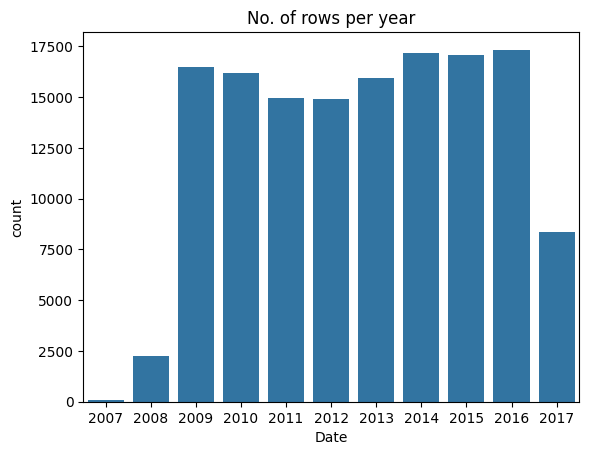

In [581]:
# lets check the data yearwise

plt.title('No. of rows per year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year)  
# .dt.year is used to seperate bats accourding to date-Year

### Note

Whenever working with a data with dates, its often a good idea to use the last part of the data  for validation and test and the first 70-80 percent of the ata to actually train the ML model.

In [582]:
year = pd.to_datetime(df.Date).dt.year

In [583]:
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [584]:
print(train_df.shape, test_df.shape, val_df.shape)

(97988, 23) (25710, 23) (17089, 23)


This may  not contain a perfect 60:20:20 ratio of data, but it ensures the entire 12 month of an year data and also the data for seasons throughout the year

## Identify the input and target columns :-

Often, not all columns in a dataset are useful for training a model. In current dataset, we can ignore the Date column, since we only want the weather conditions to make a preiction about wheather it will rain the next day.

In [585]:
df.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   
5         WNW           56.0          W  ...        55.0         23.0   
6           W           50.0         SW  ...        49.0         19.0   
7           W           35.0        SSE  ...        48.0         19.0   
8         NNW           80.0         SE  ...        42.0          9.0   
9           W           28.0          S  ...        58.0         27.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
5       1009.2       1005.4       NaN       NaN     20.6     28.9         No   
6       1009.6       1008.2       1.0       NaN     18.1     24.6         No   
7       1013.4       1010.1       NaN       NaN     16.3     25.5         No   
8       1008.9       1003.6       NaN       NaN     18.3     30.2         No   
9       1007.0       1005.7       NaN       NaN     20.1     28.2        Yes   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  
5            No  
6            No  
7            No  
8           Yes  
9            No  

[10 rows x 23 columns]

In [586]:
input_cols = list(train_df.columns)[1:-1]
target_cols = 'RainTomorrow'

In [587]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [588]:
target_cols

'RainTomorrow'

In [589]:
# creating a copy so we can make changes without affecting the real data


train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [590]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [591]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [592]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1       8.0   
1              44.0         25.0       1010.6       1007.8       NaN   
2              38.0         30.0       1007.6       1008.7       NaN   
3              45.0         16.0       1017.6       1012.8       NaN   
4              82.0         33.0       1010.8       1006.0       7.0   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8       NaN   
144549         16.0          8.0       1012.6       1007.6       NaN   
144550         15.0          8.0       1011.9       1008.0       NaN   
144551         22.0          9.0       1014.0       1009.2       NaN   
144552         16.0          9.0       1012.1       1006.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0            NaN     16.9     21.8         No  
1            NaN     17.2     24.3         No  
2            2.0     21.0     23.2         No  
3            NaN     18.1     26.5         No  
4            8.0     17.8     29.7         No  
...          ...      ...      ...        ...  
144548       NaN     23.7     31.8         No  
144549       NaN     28.9     34.8         No  
144550       NaN     29.7     35.7         No  
144551       NaN     29.8     37.2         No  
144552       NaN     30.1     37.4         No  

[97988 rows x 21 columns]

In [593]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [594]:
test_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury     20.4     37.6       0.0          NaN       NaN   
2499     Albury     20.9     33.6       0.4          NaN       NaN   
2500     Albury     18.4     23.1       2.2          NaN       NaN   
2501     Albury     17.3     23.7      15.6          NaN       NaN   
2502     Albury     15.5     22.9       6.8          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
145454    Uluru      3.5     21.8       0.0          NaN       NaN   
145455    Uluru      2.8     23.4       0.0          NaN       NaN   
145456    Uluru      3.6     25.3       0.0          NaN       NaN   
145457    Uluru      5.4     26.9       0.0          NaN       NaN   
145458    Uluru      7.8     27.0       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
2498           ENE           54.0        NaN        ESE  ...           7.0   
2499           SSE           50.0        SSE         SE  ...          17.0   
2500           ENE           48.0        ESE        ENE  ...          39.0   
2501           SSE           39.0         SE        SSE  ...          17.0   
2502           ENE           31.0         SE        SSE  ...           9.0   
...            ...            ...        ...        ...  ...           ...   
145454           E           31.0        ESE          E  ...          13.0   
145455           E           31.0         SE        ENE  ...          11.0   
145456         NNW           22.0         SE          N  ...           9.0   
145457           N           37.0         SE        WNW  ...           9.0   
145458          SE           28.0        SSE          N  ...           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
2498           46.0         17.0       1013.4       1009.2       7.0   
2499           54.0         30.0       1011.1       1008.4       8.0   
2500           62.0         67.0       1014.0       1014.8       8.0   
2501           74.0         65.0       1017.9       1016.5       8.0   
2502           92.0         63.0       1016.3       1013.9       8.0   
...             ...          ...          ...          ...       ...   
145454         59.0         27.0       1024.7       1021.2       NaN   
145455         51.0         24.0       1024.6       1020.3       NaN   
145456         56.0         21.0       1023.5       1019.1       NaN   
145457         53.0         24.0       1021.0       1016.8       NaN   
145458         51.0         24.0       1019.4       1016.5       3.0   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
2498         3.0     26.1     36.7         No  
2499         8.0     24.8     31.7         No  
2500         8.0     21.8     19.5        Yes  
2501         8.0     19.2     21.6        Yes  
2502         8.0     17.2     22.2        Yes  
...          ...      ...      ...        ...  
145454       NaN      9.4     20.9         No  
145455       NaN     10.1     22.4         No  
145456       NaN     10.9     24.5         No  
145457       NaN     12.5     26.1         No  
145458       2.0     15.1     26.0         No  

[25710 rows x 21 columns]

In [595]:
test_targets

2498       No
2499      Yes
2500      Yes
2501      Yes
2502       No
         ... 
145454     No
145455     No
145456     No
145457     No
145458     No
Name: RainTomorrow, Length: 25710, dtype: object

In [596]:
val_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury     11.4     33.5       0.0          NaN       NaN   
2134     Albury     15.5     39.6       0.0          NaN       NaN   
2135     Albury     17.1     38.3       0.0          NaN       NaN   
2136     Albury     26.0     33.1       0.0          NaN       NaN   
2137     Albury     19.0     35.2       0.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144913    Uluru     20.5     34.7       0.0          NaN       NaN   
144914    Uluru     18.0     36.4       0.0          NaN       NaN   
144915    Uluru     17.5     37.1       0.0          NaN       NaN   
144916    Uluru     20.0     38.9       0.0          NaN       NaN   
144917    Uluru     19.3     37.4       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
2133           WSW           30.0        ESE          W  ...          11.0   
2134            NE           56.0        ESE        ESE  ...           9.0   
2135           NNE           48.0         NE          N  ...          20.0   
2136           NNE           41.0        ESE          W  ...           7.0   
2137             E           33.0        SSE         SE  ...           9.0   
...            ...            ...        ...        ...  ...           ...   
144913           E           52.0        ESE          E  ...          20.0   
144914         ESE           54.0          E        ESE  ...          31.0   
144915           E           56.0          E         SE  ...          22.0   
144916           E           59.0          E        SSE  ...          17.0   
144917          SE           56.0        ESE          S  ...          28.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
2133           45.0         14.0       1013.5       1011.0       NaN   
2134           45.0         12.0       1016.0       1012.4       NaN   
2135           35.0         19.0       1017.9       1012.3       NaN   
2136           46.0         37.0       1013.6       1012.1       8.0   
2137           60.0         34.0       1017.4       1014.7       8.0   
...             ...          ...          ...          ...       ...   
144913         23.0         12.0       1013.2       1010.1       NaN   
144914         17.0          7.0       1014.7       1010.9       NaN   
144915         12.0          7.0       1012.6       1007.5       NaN   
144916         12.0         12.0       1007.2       1002.6       NaN   
144917         46.0         18.0       1007.3       1003.7       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
2133         NaN     21.0     32.7         No  
2134         NaN     25.6     38.2         No  
2135         NaN     29.2     37.0         No  
2136         5.0     27.4     30.9         No  
2137         NaN     25.6     32.5         No  
...          ...      ...      ...        ...  
144913       NaN     24.3     33.0         No  
144914       NaN     26.7     35.0         No  
144915       NaN     28.1     34.7         No  
144916       1.0     31.3     38.4         No  
144917       NaN     25.8     35.8         No  

[17089 rows x 21 columns]

In [597]:
val_targets

2133      No
2134      No
2135      No
2136      No
2137      No
          ..
144913    No
144914    No
144915    No
144916    No
144917    No
Name: RainTomorrow, Length: 17089, dtype: object

### Quick  way to segregate the numeric and categorical columns

In [598]:
numeric_columns = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_columns = train_inputs.select_dtypes('object').columns.tolist()

Here we were able to segregate the categorical data as objects easily because we had no string columns in our dataset. But if there was string datatypes then we would have to manually type the column names or apply some othher technique to first convert their datatype and thn select them.

In [599]:
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [600]:
categorical_columns

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [601]:
train_inputs[numeric_columns].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [602]:
train_inputs[categorical_columns].describe()

Location WindGustDir WindDir9am WindDir3pm RainToday
count      97988       91120      90969      96036     97988
unique        49          16         16         16         2
top     Canberra           W          N         SE        No
freq        2506        6672       8012       7603     76002

### Imputing the missing data in our dataframe

Machine learning models cannot work with missing numerical data. The process of filling missing values is called imputation.

There are various techniques, but we will choose the most basic one: replacing mising values with the average value of the column using the *SimpleImputer* class from *Sklearn*

In [603]:
from sklearn.impute import SimpleImputer

In [604]:
imputer = SimpleImputer(strategy='mean')

Before imputing lets check the no. of missing values in each column.

If we want to check how a library works in jupyter notebook we can just use help function and use the method/library as argument. And we can use the ?library/method name to see its working and detailed usage explanaation

In [605]:
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute._base:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)
 |  
 |  Univariate imputer for completing missing values with simple strategies.
 |  
 |  Replace missing values using a descriptive statistic (e.g. mean, median, or
 |  most frequent) along each column, or using a constant value.
 |  
 |  Read more in the :ref:`User Guide <impute>`.
 |  
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |  
 |  Parameters
 |  ----------
 |  missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      can be 

In [606]:
?SimpleImputer

Init signature:
SimpleImputer(
    *,
    missing_values=nan,
    strategy='mean',
    fill_value=None,
    copy=True,
    add_indicator=False,
    keep_empty_features=False,
)
Docstring:     
Univariate imputer for completing missing values with simple strategies.

Replace missing values using a descriptive statistic (e.g. mean, median, or
most frequent) along each column, or using a constant value.

Read more in the :ref:`User Guide <impute>`.

.. versionadded:: 0.20
   `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
   estimator which is now removed.

Parameters
----------
missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
    The placeholder for the missing values. All occurrences of
    `missing_values` will be imputed. For pandas' dataframes with
    nullable integer dtypes with missing values, `missing_values`
    can be set to either `np.nan` or `pd.NA`.

strategy : str or Callable, default='mean'
    The imputation strategy.

    

In [607]:
df[numeric_columns].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [608]:
train_inputs[numeric_columns].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [609]:
train_inputs[categorical_columns].isna().sum()

Location          0
WindGustDir    6868
WindDir9am     7019
WindDir3pm     1952
RainToday         0
dtype: int64

Lets fit the data into imputer to fill missing data

In [610]:
imputer.fit(df[numeric_columns])

SimpleImputer()

In [611]:
imputer.statistics_

array([  12.18482387,   23.2351203 ,    2.34997407,    5.47251551,
          7.63053986,   39.97051989,   13.99049609,   18.63114078,
         68.82683277,   51.44928835, 1017.65457715, 1015.25796259,
          4.43116082,    4.49925023,   16.98706639,   21.69318269])

Now that we have the mean values for all the numeric columns, lets fill the missing values

In [612]:
imputer.transform(train_inputs[numeric_columns])

# This does not change the original df, hence we need to save them to the df as well.

array([[13.4       , 22.9       ,  0.6       , ...,  4.49925023,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.49925023,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [17.3       , 37.8       ,  0.        , ...,  4.49925023,
        29.7       , 35.7       ],
       [20.1       , 38.5       ,  0.        , ...,  4.49925023,
        29.8       , 37.2       ],
       [22.5       , 39.6       ,  0.        , ...,  4.49925023,
        30.1       , 37.4       ]])

In [613]:
train_inputs[numeric_columns] = imputer.transform(train_inputs[numeric_columns])
test_inputs[numeric_columns] = imputer.transform(test_inputs[numeric_columns])
val_inputs[numeric_columns] = imputer.transform(val_inputs[numeric_columns])

In [614]:
train_inputs[numeric_columns]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6     5.472516   7.63054           44.0   
1           7.4     25.1       0.0     5.472516   7.63054           44.0   
2          12.9     25.7       0.0     5.472516   7.63054           46.0   
3           9.2     28.0       0.0     5.472516   7.63054           24.0   
4          17.5     32.3       1.0     5.472516   7.63054           41.0   
...         ...      ...       ...          ...       ...            ...   
144548     16.9     33.2       0.0     5.472516   7.63054           43.0   
144549     15.1     36.8       0.0     5.472516   7.63054           31.0   
144550     17.3     37.8       0.0     5.472516   7.63054           39.0   
144551     20.1     38.5       0.0     5.472516   7.63054           43.0   
144552     22.5     39.6       0.0     5.472516   7.63054           76.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
144548          24.0          26.0         22.0         13.0       1014.1   
144549          19.0          20.0         16.0          8.0       1012.6   
144550          26.0           9.0         15.0          8.0       1011.9   
144551          28.0          17.0         22.0          9.0       1014.0   
144552          30.0          13.0         16.0          9.0       1012.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0            1007.1  8.000000   4.49925     16.9     21.8  
1            1007.8  4.431161   4.49925     17.2     24.3  
2            1008.7  4.431161   2.00000     21.0     23.2  
3            1012.8  4.431161   4.49925     18.1     26.5  
4            1006.0  7.000000   8.00000     17.8     29.7  
...             ...       ...       ...      ...      ...  
144548       1009.8  4.431161   4.49925     23.7     31.8  
144549       1007.6  4.431161   4.49925     28.9     34.8  
144550       1008.0  4.431161   4.49925     29.7     35.7  
144551       1009.2  4.431161   4.49925     29.8     37.2  
144552       1006.2  4.431161   4.49925     30.1     37.4  

[97988 rows x 16 columns]

As we can see, the NaN values have been replaced by average/mean values of the columns.

In [615]:
df[numeric_columns].describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

### Scaling Numeric values

As we have a wide range of numeric values i our df i.e. rain today having values 0 and 1 where as columns like pressure having values from 970-1040. The model might give higher weight to the pressure even though the raintoday matric is much more orrelated to rain tomorrow. Hence its always a good practice to scale all the data to a smaller scale for example, values ranging from (0,1) or (-1,1).

### Lets use MinMaxScaler 
We can use *MinMaxScaler* from *sklearn.preprocesing* to scale values to the (0,1) range

In [616]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [617]:
scaler.fit(df[numeric_columns])

MinMaxScaler()

In [618]:
print('Minimum: ')
list(scaler.data_min_)

Minimum: 


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [619]:
print('Maximum: ')
list(scaler.data_max_)

Maximum: 


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

In [620]:
train_inputs[numeric_columns] = scaler.transform(train_inputs[numeric_columns])
test_inputs[numeric_columns] = scaler.transform(test_inputs[numeric_columns])
val_inputs[numeric_columns] = scaler.transform(val_inputs[numeric_columns])

In [621]:
train_inputs[numeric_columns].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

We have converted the numerical data to a more managable scale, now lets deal with the categorical columns.

Lets start with encoding the categorical data as the ML models cannot train themselves with categorical data.

In [622]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [623]:
encoder.fit(df[categorical_columns])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

Sometimes we have NaN values in out categorical data we need to fill them before encoding as onehotencoding doest work with NaN values in some online jypyter notebooks like collab due to older versions of sklearn. In those cases we just fill the NaN values with some other string data. for eg. :-

df[categorical_cols].fillna('Unknown')

In [624]:
encoded_cols = list(encoder.get_feature_names_out(categorical_columns))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [625]:
# Fill NaNs with a placeholder category
train_inputs[categorical_columns] = train_inputs[categorical_columns].fillna('missing')
test_inputs[categorical_columns] = test_inputs[categorical_columns].fillna('missing')
val_inputs[categorical_columns] = val_inputs[categorical_columns].fillna('missing')

# Now apply one-hot encoding
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_columns])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_columns])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_columns])


C:\Users\Prabhjot\AppData\Local\Temp\ipykernel_5100\773806181.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Prabhjot\AppData\Local\Temp\ipykernel_5100\773806181.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Prabhjot\AppData\Local\Temp\ipykernel_5100\773806181.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

In [626]:
test_inputs[categorical_columns].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

To save the post processing state of data and not needing to encode everything agai an again we can save this version of data in our jupyter notebooks using the parquet library (pyarrow --quiet)

In [627]:
!pip install --quiet pyarrow


train_inputs.to_parquet('train_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

Now we have parquet files in our base folder and we can directly use them as is

In [628]:
# In order to use these files we can read them with pandas library aswell

wx = pd.read_parquet('./test_inputs.parquet')
xy = pd.read_parquet('./train_inputs.parquet')
yz = pd.read_parquet('./val_inputs.parquet')

In [629]:
# Importing Logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')

In [630]:
# Training model with .fit method

model.fit(train_inputs[numeric_columns + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [631]:
print(numeric_columns + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [632]:
print(model.coef_.tolist())

[[0.8944649635374456, -2.8837510161888757, 3.167080372921782, 0.8754943099895975, -1.671196456225473, 6.767478979149371, -0.9347380640177605, -1.4308253055169171, 0.32169169315777557, 5.9982232502326305, 5.479708281591718, -9.19328322139039, -0.16163660296635818, 1.2877849666940087, 0.47439498249745937, 2.0304008818924477, 0.6006189336616753, -0.5482722410692248, 0.4758508618982403, 0.005501967545252151, 0.3448182828299583, -0.354179655452906, 0.17795290292405952, 0.43973064404210443, -0.015400167158189733, 0.02754693936558156, 0.25686275230207223, -0.02191328531542825, -0.04482249119672794, -0.48457589585041544, -0.13897518224208627, -0.5769820736723386, -0.7888211060178927, -0.2577180934649658, -0.33014951396690195, -0.5704164777143614, 0.0800581401589314, 0.010463599470917939, 0.06308091191266763, -0.9041734574562714, -0.4426320576125459, 0.0038126148366724086, -0.46231591959163004, -0.4666797826878455, -0.07067842300053526, 0.189864956343563, 0.44868943787127524, 0.6068535211731075

In [633]:
weight_df = pd.DataFrame({
    'features':(numeric_columns + encoded_cols),
    'weight': model.coef_.tolist()[0] # we have to use [0] as the coef is a 2 dimentional arr
})

weight_df

features    weight
0           MinTemp  0.894465
1           MaxTemp -2.883751
2          Rainfall  3.167080
3       Evaporation  0.875494
4          Sunshine -1.671196
..              ...       ...
113  WindDir3pm_WNW -0.101626
114  WindDir3pm_WSW -0.344114
115  WindDir3pm_nan  0.000000
116    RainToday_No -1.507548
117   RainToday_Yes -1.009835

[118 rows x 2 columns]

In [634]:
print(model.intercept_)

[-2.51738291]


<Axes: xlabel='weight', ylabel='features'>

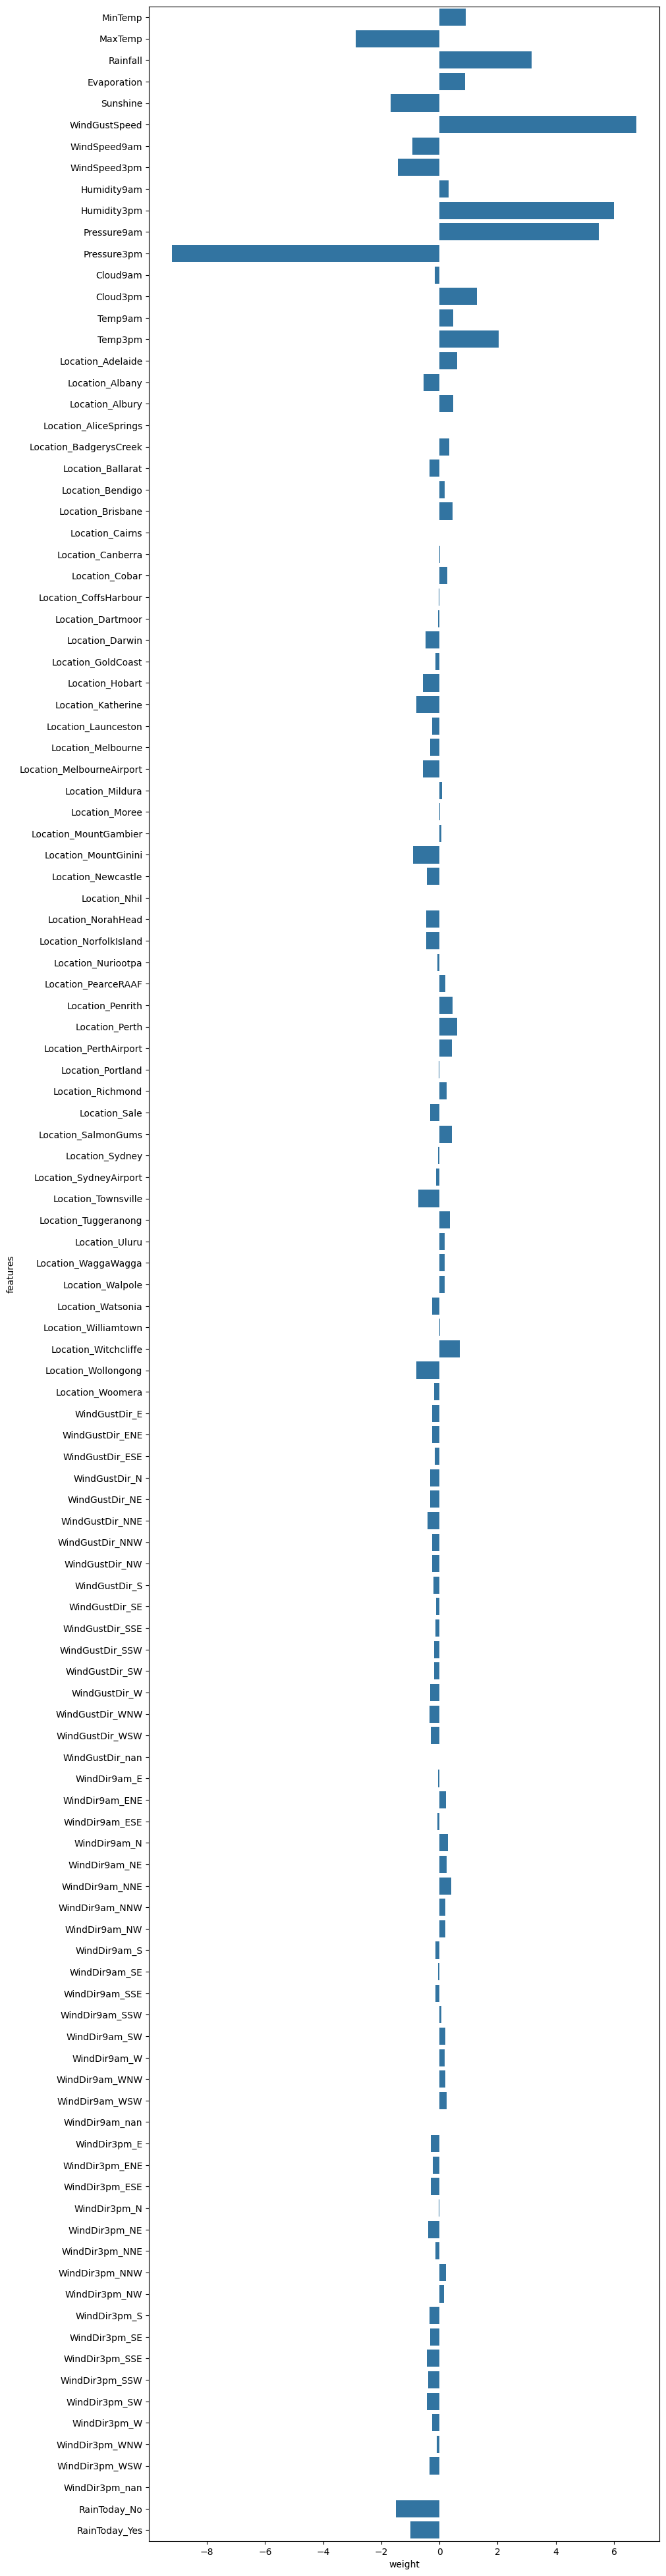

In [635]:
plt.figure(figsize=(10,50))

sns.barplot(data=weight_df, x='weight', y='features')

<Axes: xlabel='weight', ylabel='features'>

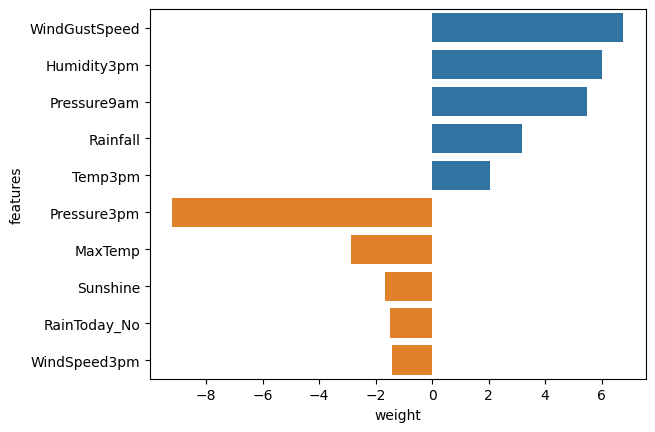

In [636]:
# we can also sort them according to their weights and just pich top n number of features

sns.barplot(data=weight_df.sort_values('weight', ascending=False).head(5), x='weight', y='features')
sns.barplot(data=weight_df.sort_values('weight', ascending=True).head(5), x='weight', y='features')

In [637]:
X_train = train_inputs[numeric_columns + encoded_cols]
X_val = val_inputs[numeric_columns + encoded_cols]
X_test = test_inputs[numeric_columns + encoded_cols]

In [638]:
train_preds = model.predict(X_train)

In [639]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [640]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

Now that we have predictions we can just check the accuracy of the model by checking the perecntage of matching values in train_preds and train_targets

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(train_targets, train_preds)

0.8519716700004082

The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [ ]:
# Insted of just getting he yes or no answer, in logistic regression we can also check the probability of them aswell.

train_prob = model.predict_proba(X_train)

train_prob

array([[0.94410184, 0.05589816],
       [0.94077573, 0.05922427],
       [0.96099604, 0.03900396],
       ...,
       [0.98747295, 0.01252705],
       [0.98331583, 0.01668417],
       [0.87427996, 0.12572004]])

Now we have a 2d array having probabilities of (No,Yes) as elements

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94622654, 0.05377346],
       [0.477475  , 0.522525  ]])

In [ ]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [ ]:
# What about the accuracy for the val and test data?

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 85.41%


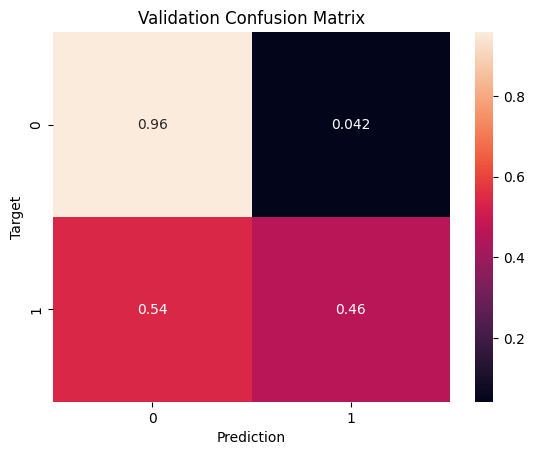

In [ ]:
# Now lets check it on the validation set

val_preds = predict_and_plot(X_val, val_targets, 'Validation')

Accuracy: 84.20%


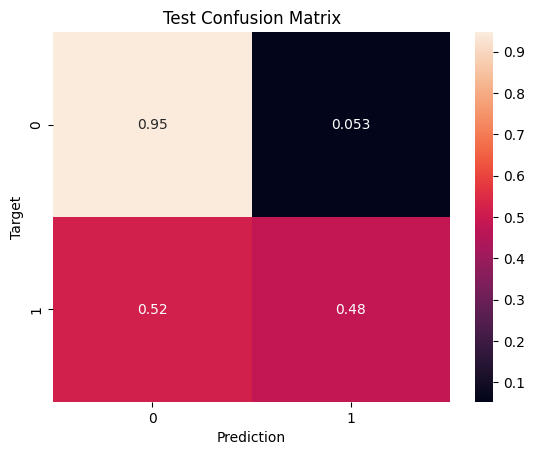

In [ ]:

test_preds = predict_and_plot(X_test, test_targets, 'Test')

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [652]:
def random_guess(inputs):
    return np.random.choice(["No","Yes"], len(inputs))

In [653]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [657]:
# Lets check if a random/dumb model which uses random function or an all no function and check if it has better accuracies than our custom made model

random_guess(X_val)

array(['Yes', 'No', 'Yes', ..., 'No', 'Yes', 'Yes'], dtype='<U3')

In [656]:
all_no(X_val)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U2')

In [663]:
accuracy_score(test_targets, random_guess(X_test))

0.5022170361726954

In [666]:
accuracy_score(test_targets, all_no(X_test))

0.7734344612991054

Our random model achieves an accuracy of 50% and our "always No" model achieves an accuracy of 77%. 

Thankfully, our model is better than a "dumb" or "random" model! This is not always the case, so it's a good practice to benchmark any model you train against such baseline models.

> **EXERCISE**: Train a logistic regression model using just the numeric columns from the dataset. Does it perform better or worse than the model trained above?

> **EXERCISE**: Train a logistic regression model without feature scaling. Also try a different strategy for missing data imputation. Does it perform better or worse than the model trained above?

> **EXERCISE**: Train a logistic regression model without feature scaling. Also try a different strategy for missing data imputation. Does it perform better or worse than the model trained above?

## Making Predictions on a Single Input

Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing data collected from the Katherine weather department today.

In [667]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

Try to mimic the original dataform

In [668]:
new_input_df = pd.DataFrame([new_input])
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0         NNW           52.0         NW  ...         20.0         89.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         58.0       1004.8       1001.5       8.0       5.0     25.7   

   Temp3pm  RainToday  
0     33.0        Yes  

[1 rows x 22 columns]

Now we have converted the dictionary data to panda dataframe.

Can we now use it as an input? NO!!!

first we need to fillna, encode and convert the data just like the original data

In [669]:
new_input_df[numeric_columns] = imputer.transform(new_input_df[numeric_columns])
new_input_df[numeric_columns] = scaler.transform(new_input_df[numeric_columns])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_columns])

C:\Users\Prabhjot\AppData\Local\Temp\ipykernel_5100\1062408981.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Prabhjot\AppData\Local\Temp\ipykernel_5100\1062408981.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Prabhjot\AppData\Local\Temp\ipykernel_5100\1062408981.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [671]:
X_new_input = new_input_df[numeric_columns + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_SE  \
0           0.1      0.229885         0.89         0.58  ...            0.0   

   WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_No  RainToday_Yes  
0             0.0             0.0             0.0           0.0            1.0  

[1 rows x 118 columns]

Now we can use this input for making prediciton

In [672]:
prediction = model.predict(X_new_input)[0]
prediction

'Yes'

Lets make a function than converts the raw input data to make it fit into the requirement for model for making some predictions.

In [674]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_columns] = imputer.transform(input_df[numeric_columns])
    input_df[numeric_columns] = scaler.transform(input_df[numeric_columns])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_columns])
    X_input = input_df[numeric_columns + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

Now lets try and check with a new data


In [675]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [676]:
predict_input(new_input)

C:\Users\Prabhjot\AppData\Local\Temp\ipykernel_5100\959997810.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Prabhjot\AppData\Local\Temp\ipykernel_5100\959997810.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Prabhjot\AppData\Local\Temp\ipykernel_5100\959997810.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragment

('Yes', 0.6473358223147051)

> **EXERCISE**: Try changing the values in `new_input` and observe how the predictions and probabilities change. Try different values of location, temperature, humidity, pressure etc. Try to get an _intuitive feel_ of which columns have the greatest effect on the result of the model.